In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# universet hedder nu dolf
kvec = [1e-1,1,1e1]
dolf = Class() # "H0":67.7
dolf.set({"h":0.6704,"Omega_b":0.07,"Omega_cdm":0.252, 'k_output_values':str(kvec).strip('[]'),
          "N_ur": 2.03351,"N_ncdm": 1,"m_ncdm": 10.06,
          'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',})#'output':'tCl, dTk, vTk',"modes":"s" })
dolf.compute()

bg = dolf.get_background()
da = 3
pb = dolf.get_perturbations()["scalar"]

# pk = dolf.get_pk() ? 
# params = dolf.get_current_derived_parameters() ?
# help(Class.get_current_derived_parameters)


In [3]:
print(bg.keys())
z = bg["z"]
a = 1/(1+z)
tau = bg['conf. time [Mpc]']
D = bg['gr.fac. D']
f = bg['gr.fac. f']

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ncdm[0]', '(.)p_ncdm[0]', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


In [4]:
#plt.loglog(a,D)
#plt.loglog(a,f)
#print(1/(1+1100))
bg["comov. dist."]

array([11266.96661594, 11266.96661594, 11266.96661594, ...,
          96.28909757,    48.10716146,     0.        ])

In [12]:
print(len(pb))
print(pb[-1])


3
{'tau [Mpc]': array([7.00009217e-03, 7.00009290e-03, 7.00009364e-03, ...,
       1.10038050e+04, 1.12316125e+04, 1.12669666e+04]), 'a': array([1.51039357e-08, 1.51039373e-08, 1.51039389e-08, ...,
       9.43068557e-01, 9.92130088e-01, 1.00000000e+00]), 'delta_g': array([-1.20279749e+00, -1.20279749e+00, -1.20279749e+00, ...,
       -1.13446980e-05, -1.11037232e-05, -1.10657268e-05]), 'theta_g': array([ 2.10108466e-01,  2.10108488e-01,  2.10108510e-01, ...,
       -6.08735284e-10, -5.73219472e-10, -5.67797365e-10]), 'shear_g': array([2.68225283e-11, 2.68225368e-11, 2.68225452e-11, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), 'pol0_g': array([6.70563208e-11, 6.70563420e-11, 6.70563631e-11, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), 'pol1_g': array([4.81524658e-20, 4.81524911e-20, 4.81525164e-20, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), 'pol2_g': array([1.34112642e-11, 1.34112684e-11, 1.34112726e-11, ...,
       0.00000000e+00, 0.

In [13]:
pb0 = pb[0] # det er her man vælger k bølgetallet.
print(pb0.keys())
#plt.loglog(pb0['tau [Mpc]'],pb0["a"])

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'delta_ncdm[0]', 'theta_ncdm[0]', 'shear_ncdm[0]', 'cs2_ncdm[0]'])


<IPython.core.display.Javascript object>


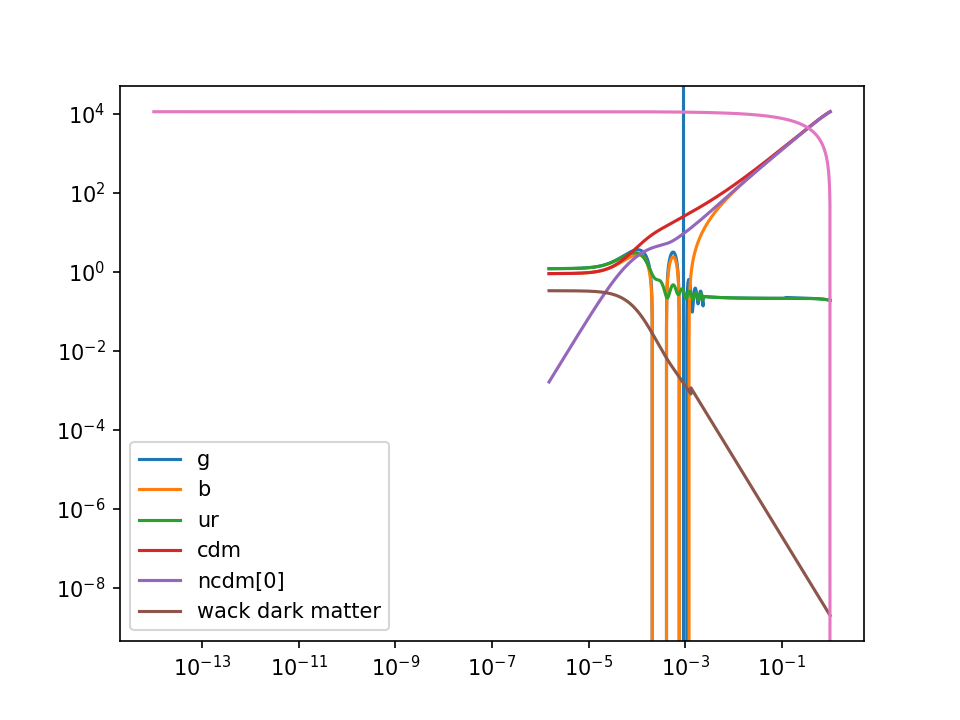

In [6]:
tau = pb0['tau [Mpc]']
a = pb0["a"]
plt.axvline(1/(1+1100))
value_list = ["g","b","ur","cdm","ncdm[0]"]

for species in value_list:
    #plt.figure(1)
    plt.loglog(a,-pb0["delta_"+species],label=species)
    
    #plt.figure(2)
    #plt.loglog(tau,pb0["theta_"+species])
plt.loglog(a,pb0['cs2_ncdm[0]'],label="wack dark matter")
plt.legend()

plt.show()

In [7]:
plt.loglog(1/(1+bg["z"]),bg["comov. dist."])

In [8]:
tm = dolf.get_thermodynamics()

In [9]:
print(tm.keys())

dict_keys(['scale factor a', 'z', 'conf. time [Mpc]', 'x_e', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])
